# High Temperature Gas Dynamics
## Ideal Dissociating Gas (Lighthill Model)

In [2]:
Pkg.add("Plots")
using Plots

  Resolving package versions...
   Updating `C:\Users\SURYA\Desktop\IIST Internship\Python programs\Project.toml`
 [no changes]
   Updating `C:\Users\SURYA\Desktop\IIST Internship\Python programs\Manifest.toml`
 [no changes]


### Degree of dissociation vs. Temperature

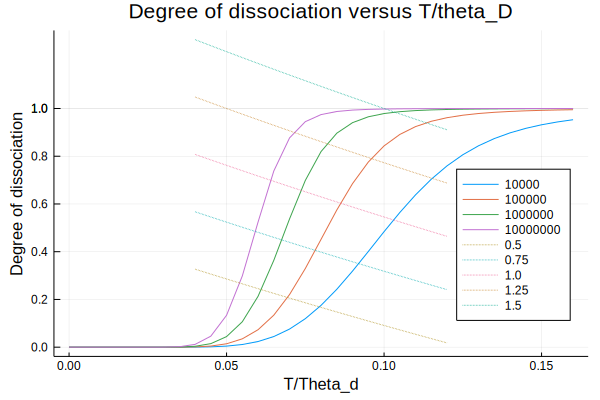

In [12]:
#To include dissociation effects at high temperatures using Lighthill model of idea dissociating gas
R_A2 = 8.314/28; #the molar gas constant for a specific gas
t = 0:0.005:0.16; #here t = T/theta_d, theta_d being the dissociation temperature
plot();
xlabel!("T/Theta_d");
ylabel!("Degree of dissociation");
for i = 4:7
    rho_r = 10^i;
    k = rho_r.*exp.(-1 ./ t);
    alpha_star = (-k .+ sqrt.(k.^2 .+ 4 .* k)) ./ 2;
    plot!(t,alpha_star, title = "Degree of dissociation versus T/theta_D", label = rho_r, legend = :bottomright);
end
#Generating the constant enthalpy lines on the alpha plot
T = 0.04:0.005:0.12;
for i = 1:5
    h_c = 0.5 +(i-1)*0.25;
    alpha_star = (h_c .- 4 .*T) ./ (1 .+ T);
    plot!(T,alpha_star, linestyle = :dot, label = h_c);
end
display(plot!(legend = :bottomright));
#Dotted lines indicate lines of constant enthalpy

### Mollier Diagram showing various curves

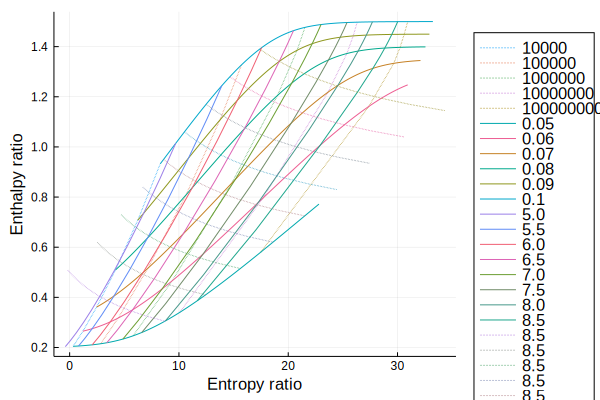

In [13]:
#Generating the mollier diagram
plot();
xlabel!("Entropy ratio");
ylabel!("Enthalpy ratio");
#first fix rho each time;
k=0;
t = 0.05:0.01:0.1;
for i = 4:8
    rho_r = 10^i;
    k = rho_r.*exp.(-1 ./ t);
    alpha_star = (-k .+ sqrt.(k.^2 .+ 4 .* k)) ./ 2;
    h = (4 .+ alpha_star).*t + alpha_star;
    s = 3 .*log.(t) + alpha_star.*(1 .- 2 .*log.(alpha_star)) .- (1 .- alpha_star).*log.(1 .- alpha_star) .+ (1 .+ alpha_star).*log(rho_r)
    plot!(s,h, linestyle = :dot, label = rho_r,legend = :none);
end   
#next fix t each time;
rho_r= 4:0.005:8.5;
for i = 1:6
    t = (i-1)*0.01 + 0.05;
    k = (10 .^rho_r).*exp(-1/t);
    alpha_star = (-k .+ sqrt.(k.^2 .+ 4 .* k)) ./ 2;
    h = (4 .+ alpha_star).*t + alpha_star;
    s = 3 .*log(t) .+ alpha_star.*(1 .- 2 .*log.(alpha_star)) .- (1 .- alpha_star).*log.(1 .- alpha_star) .+ (1 .+ alpha_star).*log(10).*(rho_r);
    if i==2;
            plot!(s,h, label = 0.06, legend = :none);
    else
    plot!(s,h, label = t, legend = :none);
    end
end
#fix pressure this time
t = 0.05:0.005:0.1;
for i = 1:8
    k = 5+(i-1)*0.5;
    alpha_star = sqrt.(1 ./ (1 .+ ((10^-k) ./ (t.*exp.(-1 ./ t)))));
    h = (4 .+ alpha_star).*t .+ alpha_star;
    s = 3 .*log.(t) .+ alpha_star.*(1 .- 2 .*log.(alpha_star)) .- (1 .- alpha_star).*log.(1 .- alpha_star) .+ (1 .+ alpha_star).*log.((alpha_star.^2 ./ (1 .- alpha_star)) .* (exp.(1 ./ t)));
    plot!(s,h, label = k, legend = :none, legendfontvalign = :bottom);
end
#fix dissociation this time
t = 0.05:0.005:0.1;
for i = 1:10
    alpha_star = 0.1+(i-1)*0.1;
    h = (4 .+ alpha_star).*t .+ alpha_star;
    s = 3 .*log.(t) .+ alpha_star.*(1 .- 2 .*log.(alpha_star)) .- (1 .- alpha_star).*log.(1 .- alpha_star) .+ (1 .+ alpha_star).*log.((alpha_star.^2 ./ (1 .- alpha_star)) .* (exp.(1 ./ t)));
    plot!(s,h, label = k, linestyle = :dot, legend = :outertopright, legendfontvalign = :bottom);
end
display(plot!()); 